In [1]:
import requests
import json

import pandas as pd
from pandas.tseries.frequencies import to_offset

import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

import time
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
# from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [42]:
weather_df = pd.read_csv("../Dataset/kanpur.csv", parse_dates=['date_time'], index_col='date_time')
weather_df


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 19:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,13,21,53,61,0.0,1019,13,8,74,11
2020-01-01 20:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,22,39,61,0.0,1020,13,9,81,11
2020-01-01 21:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,23,25,62,0.0,1020,13,10,88,11


In [43]:
weather_df.columns


Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [44]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,11


array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>],
      dtype=object)

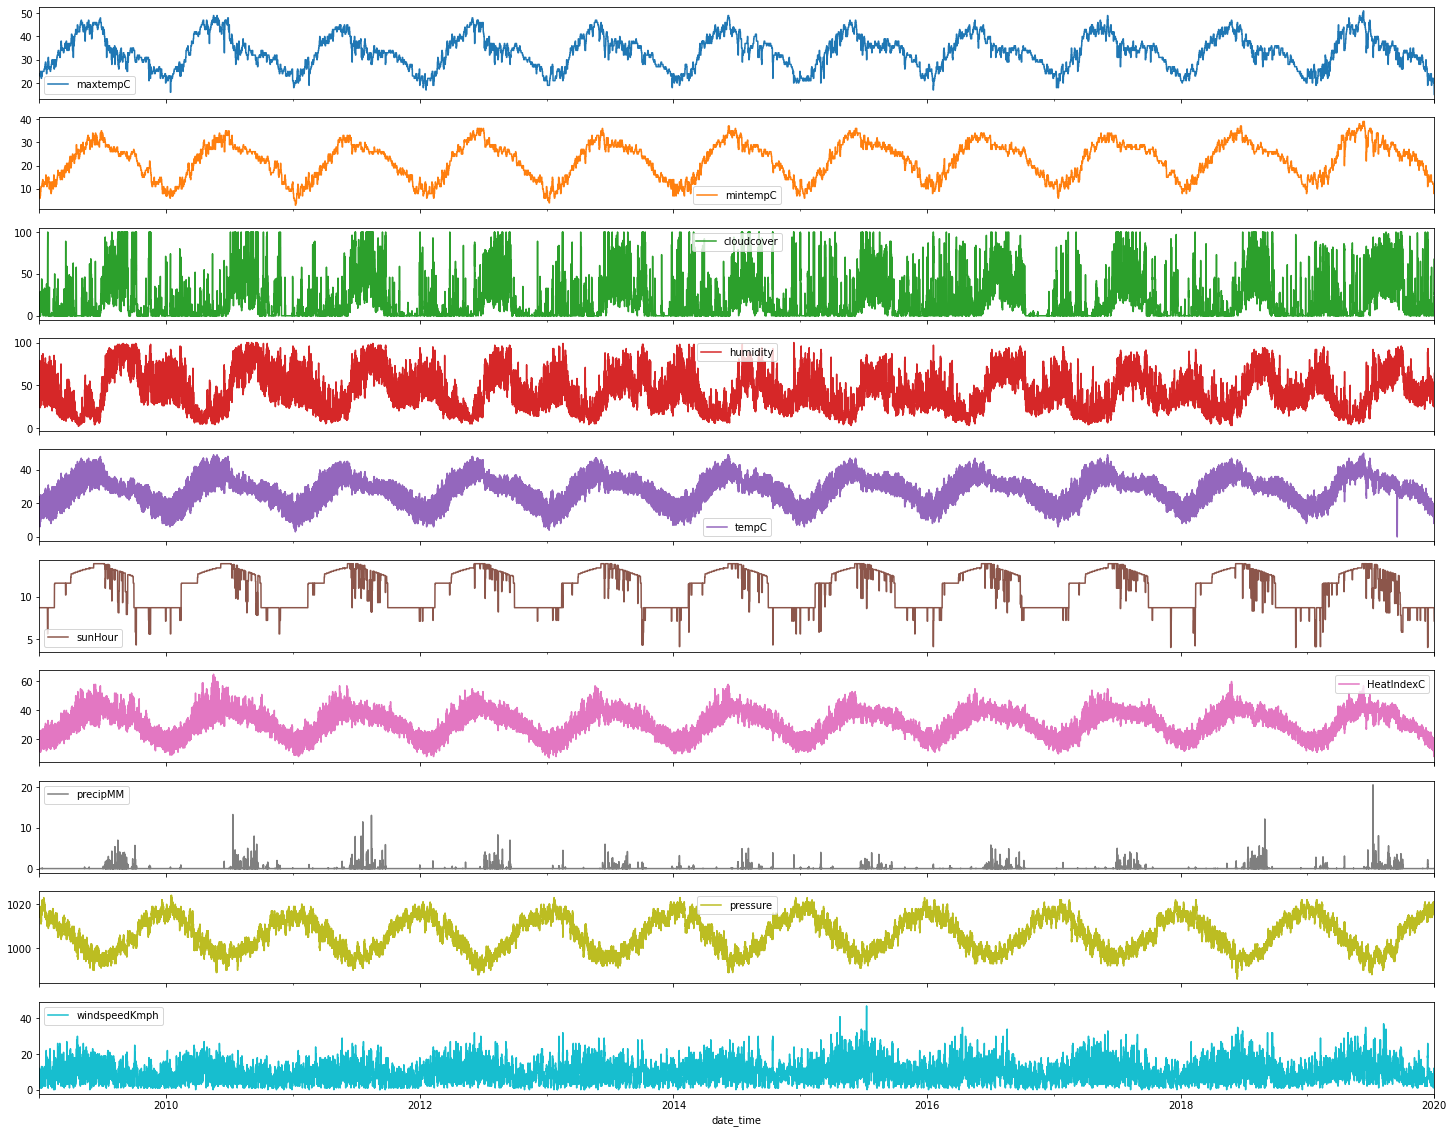

In [45]:
weather_df_num.plot(subplots=True, figsize=(25,20))


array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>],
      dtype=object)

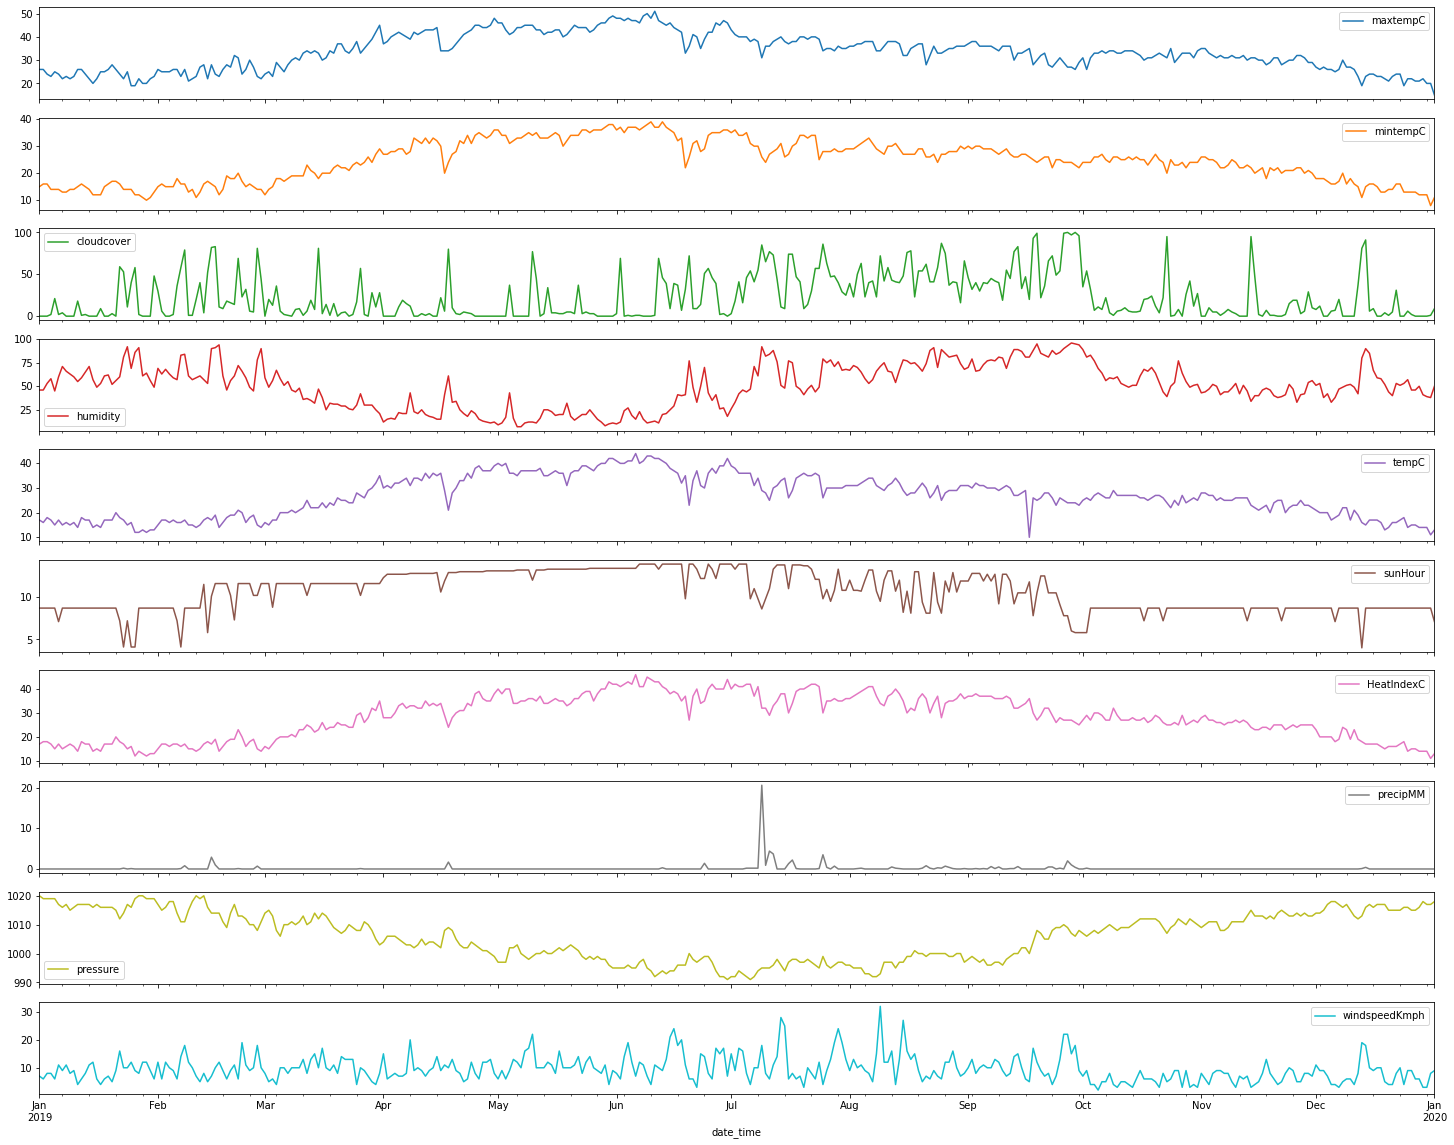

In [46]:
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))


array([[<AxesSubplot:title={'center':'maxtempC'}>,
        <AxesSubplot:title={'center':'mintempC'}>,
        <AxesSubplot:title={'center':'cloudcover'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'tempC'}>,
        <AxesSubplot:title={'center':'sunHour'}>],
       [<AxesSubplot:title={'center':'HeatIndexC'}>,
        <AxesSubplot:title={'center':'precipMM'}>,
        <AxesSubplot:title={'center':'pressure'}>],
       [<AxesSubplot:title={'center':'windspeedKmph'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

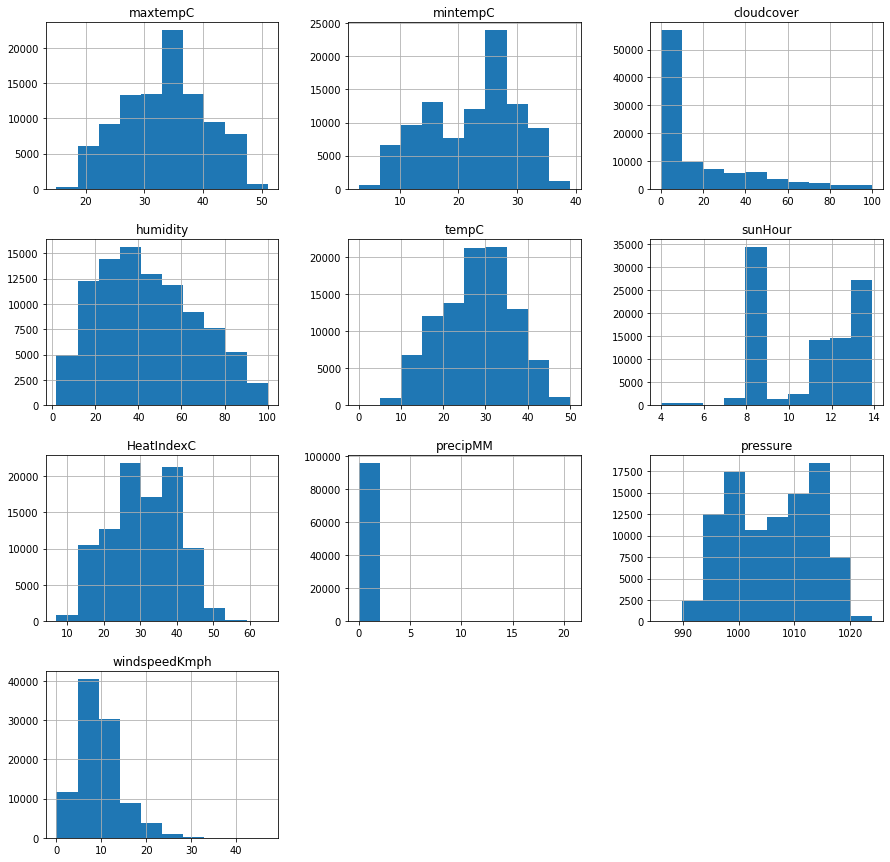

In [47]:
weather_df_num.hist(bins=10,figsize=(15,15))


In [48]:
weth=weather_df_num['2019':'2020']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-01-01 00:00:00,26,15,0,46,17,8.7,17,0.0,1020,7
2019-01-01 01:00:00,26,15,0,46,17,8.7,17,0.0,1019,7
2019-01-01 02:00:00,26,15,0,47,16,8.7,16,0.0,1019,7
2019-01-01 03:00:00,26,15,0,48,16,8.7,16,0.0,1019,6
2019-01-01 04:00:00,26,15,0,48,16,8.7,16,0.0,1019,6


In [49]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

In [52]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)


In [53]:
train_X.shape


(77145, 9)

In [54]:
train_y.shape


(77145,)

In [55]:
class Node:
    def __init__(self, split_feature=None, split_value=None, left=None, right=None, prediction=None, is_leaf=False):
        self.split_feature = split_feature
        self.split_value = split_value
        self.left = left
        self.right = right
        self.prediction = prediction
        self.is_leaf = is_leaf
        
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _split(self, X, y):
        best_feature = None
        best_value = None
        best_score = float('inf')

        m, p = X.shape
        features = np.random.choice(p, self.max_features, replace=False) if self.max_features else range(p)

        for feature in features:
            values = np.unique(X[:, feature])
            if len(values) <= 1:
                continue

            for i in range(len(values) - 1):
                value = (values[i] + values[i+1]) / 2

                left_indices = X[:, feature] <= value
                right_indices = X[:, feature] > value

                if len(y[left_indices]) < self.min_samples_leaf or len(y[right_indices]) < self.min_samples_leaf:
                    continue

                score = len(y[left_indices]) * np.var(y[left_indices]) + len(y[right_indices]) * np.var(y[right_indices])

                if score < best_score:
                    best_feature = feature
                    best_value = value
                    best_score = score

        return best_feature, best_value, best_score

    def _build_tree(self, X, y, node=None, depth=0):
        if node is None:
            node = Node()

        if depth == self.max_depth or len(y) < self.min_samples_split:
            node.is_leaf = True
            node.prediction = np.mean(y)
            return node

        split_feature, split_value, split_score = self._split(X, y)

        if split_feature is None:
            node.is_leaf = True
            node.prediction = np.mean(y)
            return node

        left_indices = X[:, split_feature] <= split_value
        right_indices = X[:, split_feature] > split_value

        node.split_feature = split_feature
        node.split_value = split_value

        node.left = self._build_tree(X[left_indices], y[left_indices], Node(), depth + 1)
        node.right = self._build_tree(X[right_indices], y[right_indices], Node(), depth + 1)

        return node

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf:
            return node.prediction
        else:
            if x[node.split_feature] <= node.split_value:
                return self._traverse_tree(x, node.left)
            else:
                return self._traverse_tree(x, node.right)

class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_estimators):
            bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
            bootstrap_X = X[bootstrap_indices]
            bootstrap_y = y[bootstrap_indices]
            
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split, 
                                          min_samples_leaf=self.min_samples_leaf, max_features=self.max_features)
            tree.fit(bootstrap_X, bootstrap_y)
            self.trees.append(tree)
            
    def predict(self, X):
        return np.mean([tree.predict(X) for tree in self.trees], axis=0)

In [26]:
# from sklearn.ensemble import RandomForestRegressor


In [56]:
rf = RandomForestRegressor(max_depth=26, min_samples_leaf=2, min_samples_split=10,n_estimators=160, max_features=1)
rf.fit(train_X, train_y)

KeyError: "None of [Index([25580, 59790, 31521, 33419, 53412, 30862,  8931,  3724, 36916, 60540,\n       ...\n       44575, 62436, 58376,  4673, 13901,  8893, 58511, 59701, 40407, 59501],\n      dtype='int32', length=77145)] are in the [columns]"

In [34]:
# Lets Do the prediction 

RF_train_predict=rf.predict(x_train)
RF_test_predict=rf.predict(x_test)
# print("Train data prediction:", train_predict)
# # print("Test data prediction:", test_predict)
# RF_train_predict = RF_train_predict.reshape(-1,1)
# RF_test_predict = RF_test_predict.reshape(-1,1)

print("Train data prediction:", RF_train_predict.shape)
print("Test data prediction:", RF_test_predict.shape)

Train data prediction: (67517,)
Test data prediction: (28936,)


In [35]:
# Evaluation metrices RMSE and MAE
RF_RMSE_train = math.sqrt(mean_squared_error(y_train,RF_train_predict))
RF_MSE_train = mean_squared_error(y_train,RF_train_predict)
RF_MAE_train = mean_absolute_error(y_train,RF_train_predict)

RF_RMSE_test = math.sqrt(mean_squared_error(y_test,RF_test_predict))
RF_MSE_test = mean_squared_error(y_test,RF_test_predict)
RF_MAE_test = mean_absolute_error(y_test,RF_test_predict)

print("Train data RMSE: ", RF_RMSE_train)
print("Train data MSE: ", RF_MSE_train)
print("Test data MAE: ", RF_MAE_train)
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", RF_RMSE_test)
print("Test data MSE: ", RF_MSE_test)
print("Test data MAE: ", RF_MAE_test)

Train data RMSE:  2.6936964447934053
Train data MSE:  7.25600053669263
Test data MAE:  1.6811628229620637
-------------------------------------------------------------------------------------
Test data RMSE:  3.612203272284338
Test data MSE:  13.048012480301677
Test data MAE:  2.270647400682859


In [36]:
RF_EV_train = explained_variance_score(y_train, RF_train_predict)
RF_EV_test = explained_variance_score(y_test, RF_test_predict)

print("Train data explained variance regression score:", RF_EV_train)
print("Test data explained variance regression score:", RF_EV_test)

Train data explained variance regression score: 0.6178325047532947
Test data explained variance regression score: 0.3171399115773148


In [37]:
RF_r2_train = r2_score(y_train, RF_train_predict)
RF_r2_test = r2_score(y_test, RF_test_predict)

print("Train data R2 score:", RF_r2_train)
print("Test data R2 score:", RF_r2_test)

Train data R2 score: 0.617822945385199
Test data R2 score: 0.3171303487776568
